In [1]:
#!pip install fairlearn
#!pip install raiwidgets

In [45]:
#pip install os

import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import linear_model
import joblib
from sklearn import metrics
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('../../0.dataset/impression_balanced_no_dummies.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

sorted_df=df.sort_values(by='Timestamp_impressions', ascending=True)
sorted_df.head(2)'''

"df=pd.read_csv('../../0.dataset/impression_balanced_no_dummies.csv')\ndf.drop(['Unnamed: 0'], axis=1, inplace=True)\n\nsorted_df=df.sort_values(by='Timestamp_impressions', ascending=True)\nsorted_df.head(2)"

In [3]:
'''s=sorted_df['User Profile IDs_impressions'].str.split(pat=',')
dummies_to_concatenate=pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
df_dummy=pd.concat([sorted_df, dummies_to_concatenate], axis=1)'''

"s=sorted_df['User Profile IDs_impressions'].str.split(pat=',')\ndummies_to_concatenate=pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)\ndf_dummy=pd.concat([sorted_df, dummies_to_concatenate], axis=1)"

In [4]:
'''df=df_dummy.sort_values(by='Timestamp_impressions', ascending=True)
df.head()'''
df=pd.read_csv('balanced_dummy_df.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(1)

,Timestamp_impressions,Log Type,User-Agent_impressions,Region ID_impressions,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Paying Price,Advertiser ID,User Profile IDs_impressions,Timestamp_clicks,User-Agent_clicks,User Profile IDs_clicks,Region ID_clicks,n_clicks,has click,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
0,20130606000104515,1,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",216,219,2,300,250,1,0,5,238,126,3358,"10063,13866,10111",NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Full Data set

In [5]:
df['User Profile IDs_impressions'].isna().value_counts()

False    112863
True      18324
Name: User Profile IDs_impressions, dtype: int64

In [6]:
df.columns

Index(['Timestamp_impressions', 'Log Type', 'User-Agent_impressions',
       'Region ID_impressions', 'City ID', 'Ad Exchange', 'Ad Slot Width',
       'Ad Slot Height', 'Ad Slot Visibility', 'Ad Slot Format',
       'Ad Slot Floor Price', 'Bidding Price', 'Paying Price', 'Advertiser ID',
       'User Profile IDs_impressions', 'Timestamp_clicks', 'User-Agent_clicks',
       'User Profile IDs_clicks', 'Region ID_clicks', 'n_clicks', 'has click',
       '10006', '10024', '10031', '10048', '10052', '10057', '10059', '10063',
       '10067', '10074', '10075', '10076', '10077', '10079', '10083', '10093',
       '10102', '10110', '10111', '10684', '11092', '11278', '11379', '11423',
       '11512', '11576', '11632', '11680', '11724', '11944', '13042', '13403',
       '13496', '13678', '13776', '13800', '13866', '13874', '14273', '16593',
       '16617', '16661', '16706'],
      dtype='object')

In [7]:
features=[#'Timestamp_bid'
  #, 'User-Agent_bid'
  #'City ID'
   'Ad Exchange'
  , 'Ad Slot Width'
  , 'Ad Slot Height'
  , 'Ad Slot Visibility'
  , 'Ad Slot Format'
  , 'Ad Slot Floor Price'
  , 'Bidding Price'
  , 'Paying Price'
  , 'Advertiser ID'
  , '10110'  
  ]

target='has click'

features_target=features+[target]

In [44]:
df['has click'].value_counts()

0    122368
1      8819
Name: has click, dtype: int64

In [8]:
#full datset 

#df.fillna(0,inplace=True)
df_red=df[features_target]
df_red.dropna(inplace=True)
n = len(df_red)


df_train = df_red[0:int(n*0.8)]
df_test = df_red[int(n*0.8):]

X_train=df_train[features]
X_test=df_test[features]

y_train=df_train[target]
y_test=df_test[target]



print('X_train:', X_train.shape
      , '\nX_test: ', X_test.shape 
      , '\ny_train:', y_train.shape
      , '\ny_test: ', y_test.shape)


X_train: (90290, 10) 
X_test:  (22573, 10) 
y_train: (90290,) 
y_test:  (22573,)


In [41]:
print(X_train.isna().sum())
print(X_test.isna().sum())
print(y_train.isna().sum())
print(y_test.isna().sum())

Ad Exchange            0
Ad Slot Width          0
Ad Slot Height         0
Ad Slot Visibility     0
Ad Slot Format         0
Ad Slot Floor Price    0
Bidding Price          0
Paying Price           0
Advertiser ID          0
10110                  0
dtype: int64
Ad Exchange            0
Ad Slot Width          0
Ad Slot Height         0
Ad Slot Visibility     0
Ad Slot Format         0
Ad Slot Floor Price    0
Bidding Price          0
Paying Price           0
Advertiser ID          0
10110                  0
dtype: int64
0
0


In [42]:
y_train.value_counts()

0    84590
1     5700
Name: has click, dtype: int64

In [10]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [11]:

print('X_train:', X_train.shape
      , '\nX_test: ', X_test.shape 
      , '\ny_train:', y_train.shape
      , '\ny_test: ', y_test.shape)

X_train: (90290, 10) 
X_test:  (22573, 10) 
y_train: (90290,) 
y_test:  (22573,)


## Small dataset

In [12]:
#small sample for quick training
X_train_v1=df_train[features][:10000]
X_test_v1=df_test[features][10000:11000]

y_train_v1=df_train[target][:10000]
y_test_v1=df_test[target][10000:11000]

print('X_train v1:', X_train_v1.shape
      , '\nX_test v1: ', X_test_v1.shape 
      , '\ny_train v1:', y_train_v1.shape
      , '\ny_test v1: ', y_test_v1.shape)

X_train v1: (10000, 10) 
X_test v1:  (1000, 10) 
y_train v1: (10000,) 
y_test v1:  (1000,)


In [13]:
print(X_train_v1.isna().sum())
print(X_test_v1.isna().sum())
print(y_train_v1.isna().sum())
print(y_test_v1.isna().sum())

Ad Exchange            0
Ad Slot Width          0
Ad Slot Height         0
Ad Slot Visibility     0
Ad Slot Format         0
Ad Slot Floor Price    0
Bidding Price          0
Paying Price           0
Advertiser ID          0
10110                  0
dtype: int64
Ad Exchange            0
Ad Slot Width          0
Ad Slot Height         0
Ad Slot Visibility     0
Ad Slot Format         0
Ad Slot Floor Price    0
Bidding Price          0
Paying Price           0
Advertiser ID          0
10110                  0
dtype: int64
0
0


# Load models

In [27]:
#baseline=joblib.load('/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/bid-->imp/baseline.pkl')
#logistic_model=joblib.load('/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/bid-->imp/logistic.pkl')

# Baseline

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics

baseline = DummyClassifier(strategy="prior")
baseline.fit(X_train_v1, y_train_v1)

joblib.dump(baseline, 'baseline.pkl')

['baseline.pkl']

In [32]:
training_accuracy=baseline.score(X_train_v1, y_train_v1)
print ('Training Accuracy:',training_accuracy)
test_accuracy = baseline.score(X_test_v1, y_test_v1) 
print('Accuracy of the model on unseen test data: ', test_accuracy)

Training Accuracy: 0.9489
Accuracy of the model on unseen test data:  0.908


In [34]:
1-y_train_v1.sum()/len(X_train_v1)

0.9489

# Logistic

In [14]:
time_start = timer()
logistic_model = linear_model.LogisticRegression(solver='saga', max_iter=50000)
logistic_model.fit(X_train_v1,y_train_v1)
time_end= timer()
joblib.dump(logistic_model, 'logistic.pkl')
print ("Wall time for training logistic regression: %s second"%(time_end-time_start))

Wall time for training logistic regression: 12.432850274000003 second


### Log Loss

In [36]:
training_log_loss=metrics.log_loss(y_train,logistic_model.predict_proba(X_train))
print ('Training Log Loss:',training_log_loss)
test_log_loss = metrics.log_loss(y_test, logistic_model.predict_proba(X_test)) 
print('Log Loss of the model on unseen test data: ', test_log_loss)

Training Log Loss: 0.22867665917320332
Log Loss of the model on unseen test data:  0.26595862445674767


### Accuracy

In [16]:
#logistic_model=joblib.load('logistic.pkl')
training_accuracy=logistic_model.score(X_train_v1, y_train_v1)
print ('Training Accuracy:',training_accuracy)
test_accuracy = logistic_model.score(X_test, y_test) 
print('Accuracy of the model on unseen test data: ', test_accuracy)

Training Accuracy: 0.9489
Accuracy of the model on unseen test data:  0.9228724582465778


# Fairlearn dashboard

In [38]:
#from fairlearn.widget import FairlearnDashboard
from raiwidgets import FairnessDashboard

FairnessDashboard(y_true = y_test_v1,
                   y_pred = logistic_model.predict(X_test_v1),
                   sensitive_features = X_test_v1['10110'],
                   #sensitive_feature_names = ["City ID"]
                   )

In [41]:
#logistic_model=joblib.load('logistic.pkl')

In [31]:
from fairlearn.metrics import MetricFrame

#logistic_model=joblib.load('logistic.pkl')

y_true=y_train_v1
y_pred=logistic_model.predict(X_train_v1)

grouped_metric = MetricFrame(metrics.accuracy_score
                              , y_true
                              , y_pred
                              ,sensitive_features=X_train_v1['10110'])

In [32]:

grouped_metric.overall

0.9489

In [33]:
grouped_metric.by_group

10110
0.0    0.941756
1.0    0.955159
Name: accuracy_score, dtype: object

In [34]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
constraint = DemographicParity()
classifier = logistic_model

In [35]:
mitigator = ExponentiatedGradient(classifier, constraint)

In [36]:
mitigator.fit(X_train_v1, y_train_v1, sensitive_features=X_train_v1['10110'])
y_pred_mitigated = mitigator.predict(X_test_v1)

In [37]:
y_pred_mitigated.shape

(1000,)

In [38]:
y_true=y_test_v1
y_pred=y_pred_mitigated

grouped_metric_mit = MetricFrame(metrics.accuracy_score
                              , y_true
                              , y_pred
                              ,sensitive_features=X_test_v1['10110'])

In [39]:
grouped_metric_mit.by_group

10110
0.0     0.90824
1.0    0.907725
Name: accuracy_score, dtype: object

<AxesSubplot:xlabel='10110'>

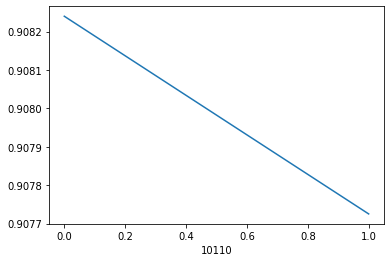

In [40]:
FairlearnDashboard(sensitive_features=sex,
                    sensitive_feature_names=['sex'],
                    y_true=y_true,
                    y_pred={"initial model": y_pred, "mitigated model": y_pred_mitigated}) 